In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [221]:
df_train = pd.read_csv("Dataset/kendaraan_train.csv")
df_train.drop(['id'], axis=1, inplace=True)

print("Total Dataset :", len(df_train))
df_train.sample(5)

Total Dataset : 285831


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
187076,Pria,48.0,1.0,38.0,0.0,1-2 Tahun,Pernah,37608.0,124.0,69.0,0
129249,Wanita,23.0,1.0,15.0,0.0,< 1 Tahun,Pernah,26258.0,152.0,114.0,0
249460,Wanita,30.0,1.0,8.0,1.0,< 1 Tahun,Tidak,34294.0,152.0,31.0,0
225256,Pria,22.0,1.0,28.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,NaN,0
74096,Pria,32.0,1.0,14.0,0.0,< 1 Tahun,Pernah,34716.0,124.0,91.0,0


In [222]:
df_test = pd.read_csv("Dataset/kendaraan_test.csv")

print("Total Dataset :", len(df_test))
df_test.sample(5)

Total Dataset : 47639


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
44832,Pria,40,1,46,1,1-2 Tahun,Tidak,18859,124,190,0
13901,Pria,42,1,50,1,1-2 Tahun,Tidak,28556,8,218,0
21366,Pria,22,1,30,1,< 1 Tahun,Tidak,20089,152,245,0
41343,Wanita,50,1,37,1,1-2 Tahun,Tidak,2630,152,56,0
43360,Wanita,23,1,33,1,< 1 Tahun,Tidak,28629,152,186,0


In [223]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [224]:
df_train.isna().sum()


Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [225]:
df_test.isna().sum()


Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Penanganan Outliers**

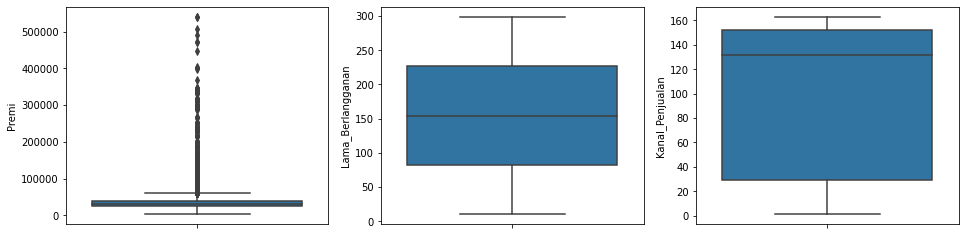

In [226]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 4))
sns.boxplot(y='Premi', data=df_train, ax=axs[0])
sns.boxplot(y='Lama_Berlangganan', data=df_train, ax=axs[1])
sns.boxplot(y='Kanal_Penjualan', data=df_train, ax=axs[2])
plt.show()

In [227]:
Q1 = df_train["Premi"].quantile(0.25)
Q3 = df_train["Premi"].quantile(0.75)
IQR = Q3 - Q1

BB = Q1 - (1.5 * IQR)
BA = Q3 + (1.5 * IQR)

print("Batas Atas : ", BA)
print("Batas Bawah : ", BB)


Batas Atas :  61847.375
Batas Bawah :  1928.375


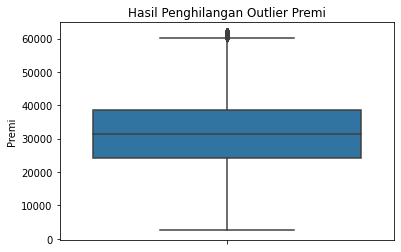

In [228]:
df_train = df_train[~((df_train["Premi"] < BB) | (df_train["Premi"] > BA))]

plt.title("Hasil Penghilangan Outlier Premi")
sns.boxplot(y=df_train["Premi"])
plt.show()


In [229]:
df_train = df_train.fillna(df_train.mean())

In [230]:
df_train = df_train.dropna()
df_train.isna().sum()


Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Label Encoding**


In [231]:
def label_encoding(df):
    df['Jenis_Kelamin'] = df[['Jenis_Kelamin']].replace(['Wanita', 'Pria'], [0, 1])
    df['Umur_Kendaraan'] = df[['Umur_Kendaraan']].replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0, 1, 2])
    df['Kendaraan_Rusak'] = df[['Kendaraan_Rusak']].replace(['Tidak', 'Pernah'], [0, 1])
    df['Sudah_Asuransi'] = df[['Sudah_Asuransi']].replace(['Tidak', 'Pernah'], [0, 1])


label_encoding(df_train)
label_encoding(df_test)


## **One Hot Encoding**

In [232]:
# categorical = ['Jenis_Kelamin', 'Kendaraan_Rusak', 'Umur_Kendaraan']
# df_train = pd.get_dummies(df, columns=categorical)
# df_train.sample(5)

In [233]:
# df_test = pd.get_dummies(df_test, columns=categorical)
# df_test.sample(5)

## **Min Max Scaler**

In [234]:
scaler = MinMaxScaler()
numerical = ['Premi', 'Lama_Berlangganan', 'Umur', 'Kode_Daerah', 'Kanal_Penjualan']

df_train[numerical] = scaler.fit_transform(df_train[numerical].values)
df_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
261215,0,0.307692,1.0,0.538462,0.0,1,1,0.000000,0.759259,0.716263,0
132443,1,0.061538,1.0,0.884615,1.0,0,0,0.554013,0.932099,0.487889,0
153974,0,0.569231,1.0,0.538462,0.0,1,0,0.474644,0.018519,0.391003,0
202373,0,0.753846,1.0,0.538462,0.0,1,1,0.541247,0.969136,0.968858,1
128966,0,0.769231,1.0,0.538462,1.0,1,0,0.947532,0.759259,0.647059,0


In [235]:
df_test[numerical] = scaler.fit_transform(df_test[numerical].values)
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
41600,0,0.461538,1,0.884615,0,2,1,0.094306,0.154321,0.086505,1
29362,1,0.215385,1,0.692308,0,1,1,0.057894,0.154321,0.730104,0
43019,1,0.661538,1,0.538462,0,1,1,0.080882,0.759259,0.356401,0
10885,1,0.015385,1,0.153846,0,0,1,0.067927,0.932099,0.833910,0
42941,1,0.661538,0,0.538462,0,1,1,0.086567,0.154321,0.103806,0


In [236]:
df_train.to_csv('Dataset/kendaraan_train_clean.csv', index=False)
df_test.to_csv('Dataset/kendaraan_test_clean.csv', index=False)
